<a href="https://colab.research.google.com/github/sarindesai/Assignment4.SLR/blob/main/Assignment_4(SLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUE-1) Predict delivery time using sorting time.                                        
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.  

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load dataset
df=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Simple%20Linear%20Regression/delivery_time.csv')

In [ ]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


EDA and Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
#count of duplicate rows
df[df.duplicated()].shape

(0, 2)

In [ ]:
# Renaming Columns
DTime=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
DTime

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Data Visualization

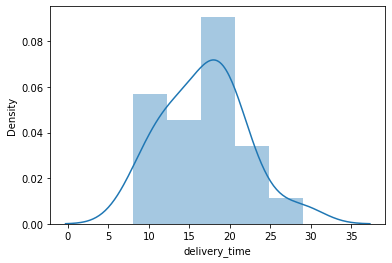

In [ ]:
sns.distplot(DTime['delivery_time'])

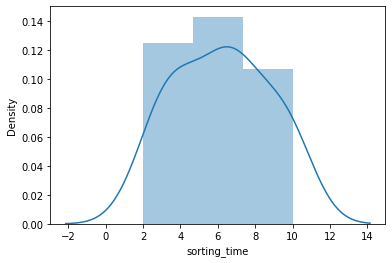

In [ ]:
sns.distplot(DTime['sorting_time'])

Correlation Analysis

In [ ]:
DTime.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


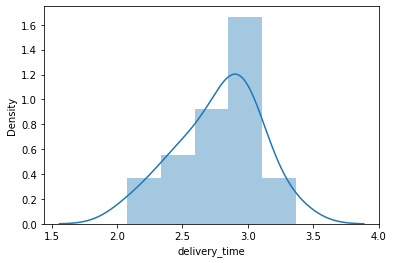

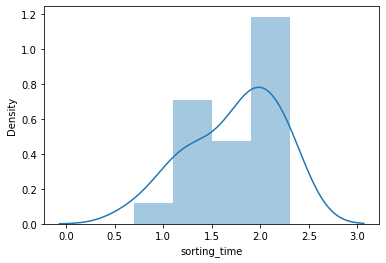

<Figure size 432x288 with 0 Axes>

In [ ]:
#use any one transformation(LOG,LOG Sqr,BOX-COX)till skewness is removed
#perform LOG transformations
data=DTime
data['delivery_time']=np.log(data['delivery_time'])
data['sorting_time']=np.log(data['sorting_time'])
sns.distplot(data['delivery_time'])
fig=plt.figure()
sns.distplot(data['sorting_time'])
fig=plt.figure()


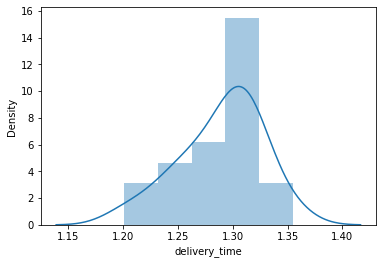

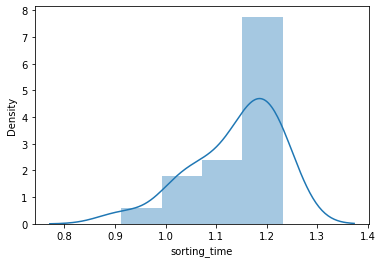

<Figure size 432x288 with 0 Axes>

In [ ]:
#perform LOG Squareroot transformations
data_sqrt=np.sqrt(data)
data_sqrt['delivery_time']=np.sqrt(data_sqrt['delivery_time'])
data_sqrt['sorting_time']=np.sqrt(data_sqrt['sorting_time'])
sns.distplot(data_sqrt['delivery_time'])
fig=plt.figure()
sns.distplot(data_sqrt['sorting_time'])
fig=plt.figure()



Model Building

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data_sqrt).fit()

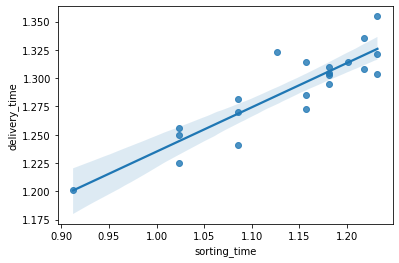

In [ ]:
sns.regplot(x=data_sqrt['sorting_time'],y=data_sqrt['delivery_time'])

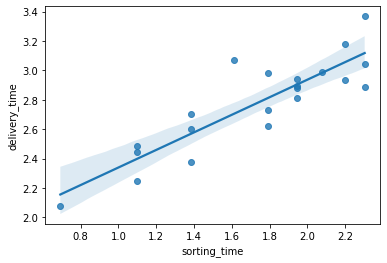

In [ ]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     74.67
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           5.23e-08
Time:                        10:20:06   Log-Likelihood:                 56.138
No. Observations:                  21   AIC:                            -108.3
Df Residuals:                      19   BIC:                            -106.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8434      0.052     16.308      0.000       0.735       0.952
sorting_time     0.3917      0.045      8.641      0.000       0.297       0.487
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.572
Skew:                           0.384   Prob(JB):                        0.751
Kurtosis:                       2.749   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#finding coefficient parameters
model.params

Intercept       0.843401
sorting_time    0.391721
dtype: float64

In [ ]:
#finding t-values and p-values
model.tvalues, model.pvalues

(Intercept       16.308287
 sorting_time     8.641312
 dtype: float64, Intercept       1.253366e-12
 sorting_time    5.233659e-08
 dtype: float64)

In [ ]:
# Findings r suqared values
model.rsquared , model.rsquared_adj

(0.7971651708557469, 0.7864896535323651)

Model Prediction

In [ ]:
print('delivery_time using sorting_time:')
model.predict(data)

delivery_time using sorting_time:


0     1.745372
1     1.386441
2     1.545271
3     1.704100
4     1.745372
5     1.545271
6     1.605655
7     1.273750
8     1.745372
9     1.704100
10    1.657962
11    1.386441
12    1.605655
13    1.273750
14    1.273750
15    1.386441
16    1.545271
17    1.605655
18    1.114921
19    1.605655
20    1.473851
dtype: float64

QUE-2) Salary_hike Build a prediction model for salary_hike                      
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
#load the dataset
df=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Simple%20Linear%20Regression/Salary_Data.csv')

In [ ]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


EDA and Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
#count duplicated rows
df[df.duplicated()].shape

(0, 2)

In [ ]:
#Renaming columns
df1=df.rename(columns={'YearsExperience':'YE','Salary':'Sal'}, inplace=False)

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Data Visualizations

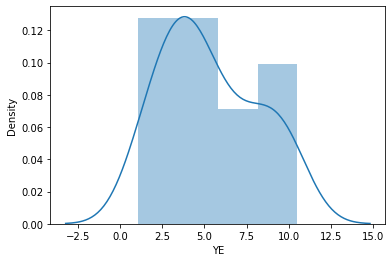

In [ ]:
sns.distplot(df1['YE'])

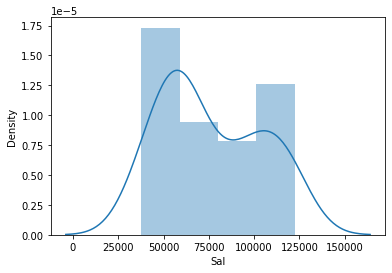

In [ ]:
sns.distplot(df1['Sal'])

Correlation Analysis

In [ ]:
df1.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


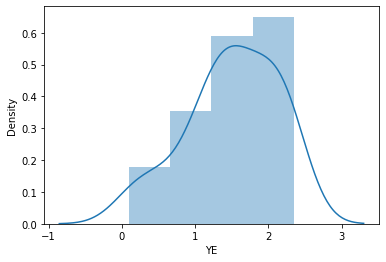

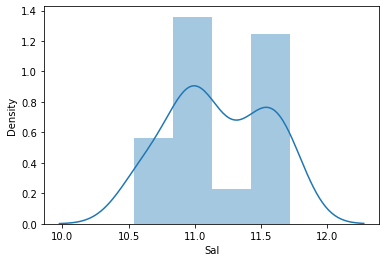

<Figure size 432x288 with 0 Axes>

In [ ]:
## Use any one transformation(LOG,LOG Square,BOX-COX) till skewness is removed
# Perform Log transformations

data=df1
data['YE'] = np.log(data['YE'])
data['Sal'] = np.log(data['Sal'])
sns.distplot(data['YE'])
fig = plt.figure()
sns.distplot(data['Sal'])
fig = plt.figure()

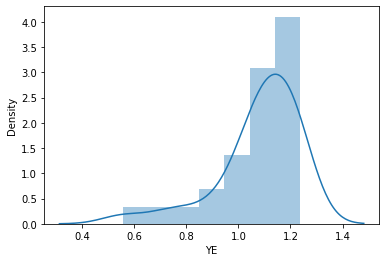

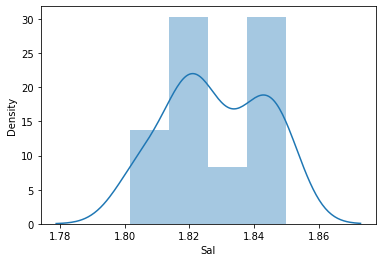

<Figure size 432x288 with 0 Axes>

In [ ]:
# Performing sqrt transformations
data_sqrt = np.sqrt(data)
data_sqrt['YE'] = np.sqrt(data_sqrt['YE'])
data_sqrt['Sal'] = np.sqrt(data_sqrt['Sal'])
sns.distplot(data_sqrt['YE'])
fig = plt.figure()
sns.distplot(data_sqrt['Sal'])
fig = plt.figure()

Model Building

In [ ]:
import statsmodels.formula.api as smf
model1=smf.ols('Sal~YE',data=df1).fit()

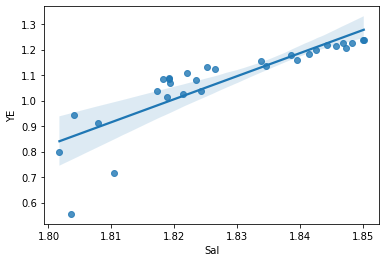

In [ ]:
sns.regplot(x=data_sqrt['Sal'],y=data_sqrt['YE'])

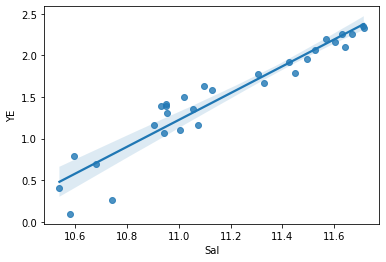

In [ ]:
sns.regplot(x=data['Sal'],y=data['YE'])

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     74.67
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           5.23e-08
Time:                        10:43:18   Log-Likelihood:                 56.138
No. Observations:                  21   AIC:                            -108.3
Df Residuals:                      19   BIC:                            -106.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8434      0.052     16.308      0.000       0.735       0.952
sorting_time     0.3917      0.045      8.641      0.000       0.297       0.487
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.572
Skew:                           0.384   Prob(JB):                        0.751
Kurtosis:                       2.749   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#finding parameters
model1.params

Intercept    10.328043
YE            0.562089
dtype: float64

In [ ]:
#finding t-values and p-values
model.tvalues,model.pvalues

(Intercept       16.308287
 sorting_time     8.641312
 dtype: float64, Intercept       1.253366e-12
 sorting_time    5.233659e-08
 dtype: float64)

In [ ]:
#finding rsquared values
model1.rsquared, model1.rsquared_adj

(0.905215072581715, 0.9018298966024905)

Model Prediction

In [ ]:
print('YE using Sal')
model1.predict(data)

YE using Sal


0     10.381616
1     10.475515
2     10.555951
3     10.717653
4     10.771226
5     10.926505
6     10.945561
7     10.981837
8     10.981837
9     11.063442
10    11.093033
11    11.107264
12    11.107264
13    11.121143
14    11.173468
15    11.221335
16    11.243821
17    11.265443
18    11.325724
19    11.335171
20    11.405524
21    11.429791
22    11.489804
23    11.510753
24    11.544023
25    11.563079
26    11.593469
27    11.599355
28    11.638915
29    11.649725
dtype: float64